In [2]:
%matplotlib inline
import pandas as PandaLib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import math as mt
from collections import Counter
import pydotplus
import StringIO
from scipy import misc
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor

#OpenFile = PandaLib.read_csv('D:/study/Data Analytics\Project_Data_And_Code/Traffic_data.csv')
OpenFile  = PandaLib.read_csv('D:/study/Data Analytics/Project_Data_And_Code/Traffic_data.csv',low_memory='False')
#Remove All the missing values
ConvertToDataFrame = PandaLib.DataFrame(OpenFile)
ConvertToNan1 =ConvertToDataFrame.replace('UU',np.NaN)
ConvertToNan2 =ConvertToNan1.replace('UUUU',np.NaN)
ConvertToNan3 = ConvertToNan2.replace('NN' ,np.NaN)
ConvertToNan4 = ConvertToNan3.replace('NNNN',np.NaN)
ConvertToNan5 = ConvertToNan4.replace('N',np.NaN)
ConvertToNan6 = ConvertToNan5.replace('QQ',np.NaN)
ConvertToNan7 = ConvertToNan6.replace('N',np.NaN)
ConvertToNan8 = ConvertToNan7.replace('U',np.NaN)
ConvertToNan9 = ConvertToNan8.replace('Q',np.NaN)
ConvertToDataFrameFinal = PandaLib.DataFrame(ConvertToNan9)
CLeanedData =ConvertToDataFrameFinal.dropna(axis=0,how='any')
CLeanedData.drop(['Road_Alignment'],axis = 1, inplace = True)
CLeanedData.drop(['Vehicle_ ID'],axis = 1, inplace = True)
CLeanedData.drop(['Person_Sex'],axis = 1, inplace = True)
CLeanedData = CLeanedData.sample(50000)

#converting all the object types into numeric ones
List_Of_variables = ['Collision_Month', 'Day_of_the_week','Collision_Hour','No_of_vehicles_in_collision','No_of_vehicles_in_collision',
                     'Collision_Configuration','Roadway_collision','weather_condition','Road_Surface','Traffic_control',
                    'Vehicle_Type','Vehicle_Year_ Model','Person_ID','Person_Position','Medical_Treatment_required',
                    'Safety_Device_Required','Road_User_Class','Person_Age']

for each in List_Of_variables:
    CLeanedData[each] = PandaLib.to_numeric(CLeanedData[each])


C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [3]:
# Divide data into train test 
TrainingData, TestingData = train_test_split(CLeanedData, test_size=0.3)
TrainingData = TrainingData.dropna(axis=0,how='any')
print TrainingData.info()
print TrainingData.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 183983 to 132687
Data columns (total 19 columns):
Year                           35000 non-null int64
Collision_Month                35000 non-null int64
Day_of_the_week                35000 non-null int64
Collision_Hour                 35000 non-null int64
Collision_Severe               35000 non-null int64
No_of_vehicles_in_collision    35000 non-null int64
Collision_Configuration        35000 non-null int64
Roadway_collision              35000 non-null int64
weather_condition              35000 non-null int64
Road_Surface                   35000 non-null int64
Traffic_control                35000 non-null int64
Vehicle_Type                   35000 non-null int64
Vehicle_Year_ Model            35000 non-null int64
Person_ID                      35000 non-null int64
Person_Age                     35000 non-null int64
Person_Position                35000 non-null int64
Medical_Treatment_required     35000 non-null int64
S

,Year,Collision_Month,Day_of_the_week,Collision_Hour,Collision_Severe,No_of_vehicles_in_collision,Collision_Configuration,Roadway_collision,Road_Surface,Traffic_control,Vehicle_Type,Vehicle_Year_ Model,Person_ID,Person_Age,Person_Position,Medical_Treatment_required,Safety_Device_Required,Road_User_Class
weather_condition,,,,,,,,,,,,,,,,,,
1,2014.0,6.654554,3.963264,13.676667,1.986294,2.112917,24.187146,1.705634,1.334529,9.848633,1.790661,2006.432305,1.529166,38.649853,13.280421,1.559766,2.427166,1.394135
2,2014.0,6.849446,4.012007,13.562192,1.987069,2.010160,22.760776,1.659175,1.810961,11.233990,1.779249,2006.091441,1.504926,38.156096,12.854988,1.628695,2.303879,1.341133
3,2014.0,7.847608,3.783816,14.267868,1.989959,2.052865,23.834022,1.756054,2.087419,9.352038,1.603367,2006.051979,1.440343,38.148848,12.886297,1.547549,2.243060,1.322800
4,2014.0,5.182025,4.070359,13.489333,1.988198,2.234226,21.278257,1.549705,3.521108,12.428053,1.536087,2006.203813,1.463913,38.005447,12.926010,1.601453,2.176123,1.301861
5,2014.0,6.560000,4.366667,12.860000,1.973333,1.820000,15.480000,1.493333,4.346667,14.860000,1.573333,2005.000000,1.460000,35.046667,13.613333,1.646667,2.246667,1.333333
6,2014.0,4.399225,3.771318,12.366925,1.976744,2.878553,20.223514,1.406977,3.329457,14.989664,1.832041,2006.062016,1.598191,37.541344,13.555556,1.648579,2.341085,1.307494
7,2014.0,4.099291,3.524823,13.184397,1.985816,3.695035,18.283688,1.404255,3.163121,14.347518,2.007092,2006.773050,1.446809,38.723404,14.007092,1.638298,2.297872,1.361702


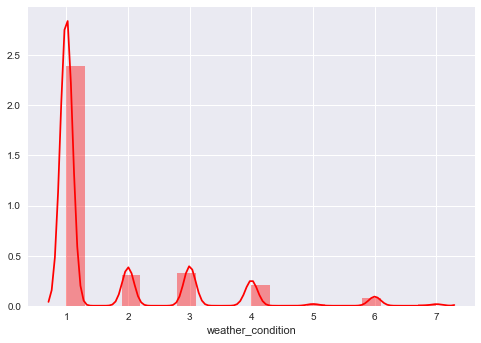

In [4]:
#we are focusing on weather condition so plotting the graph and analysing 
sns.distplot(TrainingData['weather_condition'], bins=20,color='red')
TrainingData['weather_condition'].value_counts()
TrainingData.groupby('weather_condition').mean()

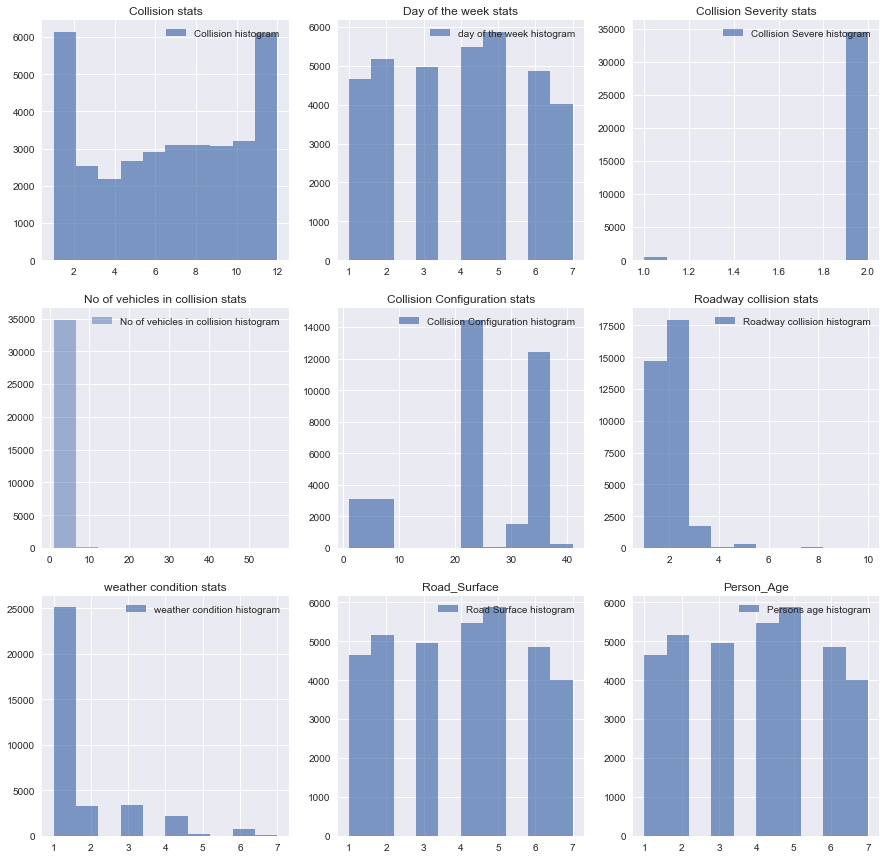

In [5]:
#Visualising the data
#Visualize data . The goal is to give an idea of how other variable graphs looks like which might be of significance in the future
#collision monthwise
fig = plt.figure(figsize=(15,15))
FirstGraph = fig.add_subplot(331)
FirstGraph.set_title("Collision stats")
Collision_Data = TrainingData['Collision_Month']
Collision_Data.hist(alpha=0.7,label = 'Collision histogram')
FirstGraph.legend(loc='upper right')

#Day Of the week
SecondGraph = fig.add_subplot(332)
SecondGraph.set_title("Day of the week stats")
WeekDay_Data = TrainingData['Day_of_the_week']
WeekDay_Data.hist(alpha=0.7,label = 'day of the week histogram')
SecondGraph.legend(loc='upper right')

#Collision_Severity
ThirdGraph = fig.add_subplot(333)
ThirdGraph.set_title("Collision Severity stats")
Collision_Severity = TrainingData['Collision_Severe']
Collision_Severity.hist(alpha=0.7,label = 'Collision Severe histogram')
ThirdGraph.legend(loc='upper right')

#No of vehicles in collision
ForthGraph = fig.add_subplot(334)
ForthGraph.set_title("No of vehicles in collision stats")
No_of_vehicles_in_collision = TrainingData['No_of_vehicles_in_collision']
No_of_vehicles_in_collision.hist(alpha=0.5,label = 'No of vehicles in collision histogram')
ForthGraph.legend(loc='upper right')

#Collision Configuration
FifthGraph = fig.add_subplot(335)
FifthGraph.set_title("Collision Configuration stats")
Collision_Configuration = TrainingData['Collision_Configuration']
Collision_Configuration.hist(alpha=0.7,label = 'Collision Configuration histogram')
FifthGraph.legend(loc='upper right')

#Roadway collision
SixthGraph = fig.add_subplot(336)
SixthGraph.set_title("Roadway collision stats")
Roadway_collision = TrainingData['Roadway_collision']
Roadway_collision.hist(alpha=0.7,label = 'Roadway collision histogram')
SixthGraph.legend(loc='upper right')

#weather condition
SeventhGraph = fig.add_subplot(337)
SeventhGraph.set_title("weather condition stats")
weather_condition = TrainingData['weather_condition']
weather_condition.hist(alpha=0.7,label = 'weather condition histogram')
SeventhGraph.legend(loc='upper right')

#Road Surface
EighthGraph = fig.add_subplot(338)
EighthGraph.set_title("Road_Surface")
Road_Surface = TrainingData['Day_of_the_week']
Road_Surface.hist(alpha=0.7,label = 'Road Surface histogram')
EighthGraph.legend(loc='upper right')

#Person Age
NinthGraph = fig.add_subplot(339)
NinthGraph.set_title("Person_Age")
WeekDay_Data = TrainingData['Day_of_the_week']
WeekDay_Data.hist(alpha=0.7,label = 'Persons age histogram')
NinthGraph.legend(loc='upper right')



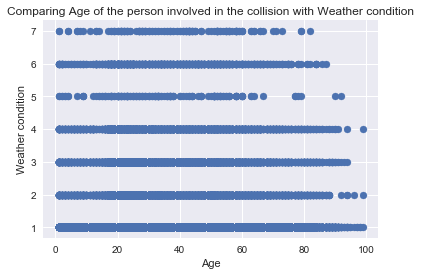

In [6]:
#We have to compare the weather conditions with respect to other data
%matplotlib inline
plt.scatter(TrainingData['Person_Age'],TrainingData['weather_condition'])
plt.title('Comparing Age of the person involved in the collision with Weather condition')
plt.xlabel('Age')
plt.ylabel('Weather condition')
plt.show()


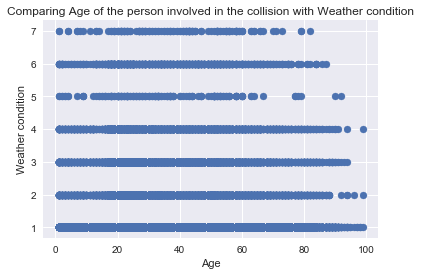

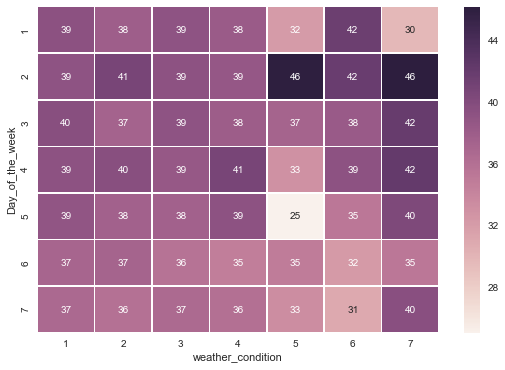

In [7]:
#We do a few more comaprisons to get a better and clear understanding of the factors involved 
%matplotlib inline
plt.scatter(TrainingData['Person_Age'],TrainingData['weather_condition'])
plt.title('Comparing Age of the person involved in the collision with Weather condition')
plt.xlabel('Age')
plt.ylabel('Weather condition')
plt.show()


#drawing a heatmap 
F = TrainingData.pivot_table("Person_Age", "Day_of_the_week", "weather_condition")
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(F, annot=True, linewidths=.5, ax=ax)

In [8]:
#We define the features 
Features =[]
for each in List_Of_variables :
    if each != 'weather_condition' :
        Features.append(each)
X_train = TrainingData[Features]
Y_train = TrainingData['weather_condition']
X_Test = TestingData[Features]
Y_Test = TestingData['weather_condition']

In [9]:
# Defining a function for importance

def Importance(Input_Parameter):
    importances=Input_Parameter.feature_importances_
    f=np.argsort(importances)[::-1]
    print ('feature ranking:')
    for i in range(X_train.shape[1]):
         print ("feature no. {}: {} ({})".format(i+1,X_train.columns[f[i]],importances[f[i]]))
 

In [22]:
#Now applying logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
#we have to install ggplot through pip install
#from ggplot import *
from sklearn.preprocessing import label_binarize
from sklearn import *
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

Mean = TrainingData['weather_condition'].mean()
print "the mean of the data is " + str(Mean)
logistic = LogisticRegression()
# rfe = RFE(logistic,17)
# rfe = rfe.fit(X_train,Y_train)
# print(rfe.support_)
# print(rfe.ranking_)

Logistic_fit = logistic.fit(X_train,Y_train)
Prediction_Model = Logistic_fit.predict(X_train)
score =accuracy_score(Y_train,Prediction_Model)
confusionMatrix = metrics.confusion_matrix(Y_train,Prediction_Model)
importance = Logistic_fit.coef_

print "The accuracy score is :" + str(score*100) + "\n"

#now finding the classification report
print(classification_report(Y_train, Prediction_Model))

#now we do cross validation just to check if the model does not overfit
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(logistic, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

the mean of the data is 1.627
The accuracy score is :69.4857142857

             precision    recall  f1-score   support

          1       0.74      0.95      0.83     25098
          2       0.00      0.00      0.00      3248
          3       0.05      0.01      0.01      3386
          4       0.22      0.23      0.22      2203
          5       0.00      0.00      0.00       150
          6       0.53      0.01      0.02       774
          7       0.00      0.00      0.00       141

avg / total       0.56      0.69      0.61     35000

10-fold cross validation average accuracy: 0.695


In [11]:
#As the accuracy is not so efficient we implement this on the test data anyways to get an estimate or idea
Logistic_fit_For_test = logistic.fit(X_Test,Y_Test) 
predict_test = Logistic_fit_For_test.predict(X_Test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(X_Test, Y_Test)))
print(classification_report(Y_Test, predict_test))


Accuracy of logistic regression classifier on test set: 0.70
             precision    recall  f1-score   support

          1       0.74      0.95      0.83     10758
          2       0.00      0.00      0.00      1351
          3       0.04      0.01      0.01      1504
          4       0.24      0.25      0.25       926
          5       0.00      0.00      0.00        74
          6       0.53      0.03      0.05       328
          7       0.00      0.00      0.00        59

avg / total       0.56      0.70      0.62     15000



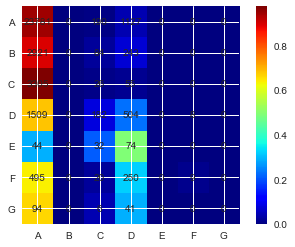

In [12]:
#plotting confusion matrix
norm_conf = []
for i in confusionMatrix:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet,interpolation='nearest')
width, height = confusionMatrix.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(confusionMatrix[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
cb = fig.colorbar(res)
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('confusion_matrix.png', format='png')


In [23]:
#We define a function to show the tree structure
def show_tree(tree,features,path):  
    f = StringIO.StringIO()
    export_graphviz(tree,out_file=f,feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = [20,20]
    plt.imshow(img)

In [14]:
# Applying Decision tree algorithm 

Decision_tree = tree.DecisionTreeClassifier(min_samples_split = 10)
DecisionTree = Decision_tree.fit(X_train,Y_train)
Prediction_Model = DecisionTree.predict(X_train)
score =accuracy_score(Y_train,Prediction_Model)
print "Train score is " + str(score*100)
Importance(DecisionTree)
#show_tree(DecisionTree,Features,'sample1.png')


Train score is 90.0742857143
feature ranking:
feature no. 1: Road_Surface (0.423388403473)
feature no. 2: Collision_Month (0.0955895179065)
feature no. 3: Person_Age (0.0923711886281)
feature no. 4: Collision_Hour (0.0797373516928)
feature no. 5: Vehicle_Year_ Model (0.0739871490305)
feature no. 6: Collision_Configuration (0.0596649707536)
feature no. 7: Day_of_the_week (0.0522441648218)
feature no. 8: Traffic_control (0.0215382480837)
feature no. 9: Roadway_collision (0.0187033373462)
feature no. 10: No_of_vehicles_in_collision (0.014807853746)
feature no. 11: Vehicle_Type (0.0143131506795)
feature no. 12: No_of_vehicles_in_collision (0.0139737587825)
feature no. 13: Medical_Treatment_required (0.0104271616913)
feature no. 14: Person_Position (0.00949746871402)
feature no. 15: Safety_Device_Required (0.00837252319001)
feature no. 16: Person_ID (0.00736238529561)
feature no. 17: Road_User_Class (0.00402136616499)


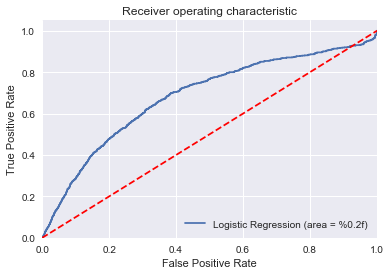

In [21]:
#Plotting the ROC curve for Logistic regression model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#First we plot for the training data
# This is a multi class problem roc curve
#logit_roc_auc = roc_auc_score(Y_train, logistic.predict(X_train),average ='micro')
fpr, tpr, thresholds = roc_curve(Y_train, logistic.predict_proba(X_train)[:,1],pos_label = 6)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' ) #% logit_roc_auc
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

Train score is 98.5314285714
feature ranking:
feature no. 1: Road_Surface (0.298117786044)
feature no. 2: Person_Age (0.112948907916)
feature no. 3: Collision_Month (0.100709510331)
feature no. 4: Vehicle_Year_ Model (0.0968626742941)
feature no. 5: Collision_Hour (0.0942762158497)
feature no. 6: Day_of_the_week (0.0667306317586)
feature no. 7: Collision_Configuration (0.0592931587635)
feature no. 8: Traffic_control (0.0241131640948)
feature no. 9: Roadway_collision (0.0210976335321)
feature no. 10: Medical_Treatment_required (0.0196696671409)
feature no. 11: Person_Position (0.0194022004895)
feature no. 12: No_of_vehicles_in_collision (0.0185676911997)
feature no. 13: No_of_vehicles_in_collision (0.0184159643559)
feature no. 14: Person_ID (0.0167862134427)
feature no. 15: Vehicle_Type (0.0152094920643)
feature no. 16: Road_User_Class (0.00994783526418)
feature no. 17: Safety_Device_Required (0.00785125345977)


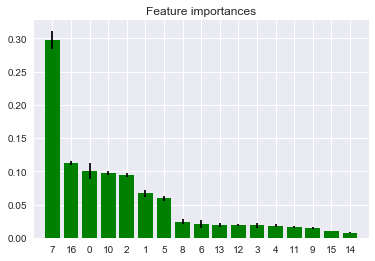

In [17]:
#applying random forest 
Random_Classifier = RandomForestClassifier()
Random_Classifier = Random_Classifier.fit(X_train,Y_train) 
Prediction_Model = Random_Classifier.predict(X_train)
score =accuracy_score(Y_train,Prediction_Model)
print "Train score is " + str(score*100)
importances=Random_Classifier.feature_importances_
Importance(Random_Classifier)
# Plot the feature importances of the forest
std = np.std([tree.feature_importances_ for tree in Random_Classifier.estimators_],axis=0)
indices = np.argsort(importances)[::-1]   
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [18]:
#We can conclude that the best model to be used is the random forest so we apply the same for the test data
#Applying Random forest on test data
Random_Classifier = Random_Classifier.fit(X_Test,Y_Test) 
Prediction_Model = Random_Classifier.predict(X_Test)
score =accuracy_score(Y_Test,Prediction_Model)
print "Test score is " + str(score*100)
importances=Random_Classifier.feature_importances_
Importance(Random_Classifier)

Test score is 98.4666666667
feature ranking:
feature no. 1: Road_Surface (0.293469192073)
feature no. 2: Person_Age (0.108800048899)
feature no. 3: Collision_Month (0.1013424181)
feature no. 4: Vehicle_Year_ Model (0.0949249776956)
feature no. 5: Collision_Hour (0.0949058132349)
feature no. 6: Day_of_the_week (0.0661812155087)
feature no. 7: Collision_Configuration (0.060311633894)
feature no. 8: Traffic_control (0.0267160456384)
feature no. 9: No_of_vehicles_in_collision (0.0226024035772)
feature no. 10: Medical_Treatment_required (0.0220715760758)
feature no. 11: Roadway_collision (0.0200160494959)
feature no. 12: Person_Position (0.0196281974931)
feature no. 13: No_of_vehicles_in_collision (0.0185498429439)
feature no. 14: Person_ID (0.0170711630612)
feature no. 15: Vehicle_Type (0.0151130316704)
feature no. 16: Safety_Device_Required (0.00949909046683)
feature no. 17: Road_User_Class (0.0087973001723)
